In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [166]:
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='NanumBarunGothic') 

In [4]:
health = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/국민건강영양조사데이터경진대회/nationalhealth_2010to2021.csv')

In [5]:
health['age'] = health['age'].astype('int')
health

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74,3.0,2.0,4.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,b'A310439801',b'A3104398',2010.0,1.0,1.0,2.0,63,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35624,b'R904322404',b'R9043224',2021.0,8.0,2.0,1.0,53,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35625,b'R904332601',b'R9043326',2021.0,8.0,2.0,1.0,50,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35626,b'R904346201',b'R9043462',2021.0,8.0,2.0,2.0,54,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35627,b'R904353001',b'R9043530',2021.0,8.0,2.0,1.0,45,3.0,3.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35629 entries, 0 to 35628
Columns: 122 entries, ID to 우울증
dtypes: float64(119), int64(1), object(2)
memory usage: 33.2+ MB


In [7]:
print(health.columns.tolist())

['ID', 'ID_fam', 'year', 'region', 'town_t', 'sex', 'age', 'incm', 'ho_incm', 'incm5', 'ho_incm5', 'edu', 'occp', 'cfam', 'genertn', 'allownc', 'marri_1', 'marri_2', 'fam_rela', 'tins', 'D_1_1', 'educ', 'EC1_1', 'EC_wht_23', 'EC_wht_5', 'EC_pedu_1', 'EC_pedu_2', 'BD1_11', 'BD2_1', 'BD2_31', 'dr_month', 'BP6_10', 'BP7', 'mh_stress', 'BS3_1', 'BE3_31', 'BE5_1', 'LW_mt', 'LW_mt_a1', 'LW_br', 'HE_fst', 'HE_HPdr', 'HE_DMdr', 'HE_mens', 'HE_prg', 'HE_HPfh1', 'HE_HPfh2', 'HE_HPfh3', 'HE_HLfh1', 'HE_HLfh2', 'HE_HLfh3', 'HE_IHDfh1', 'HE_IHDfh2', 'HE_IHDfh3', 'HE_STRfh1', 'HE_STRfh2', 'HE_STRfh3', 'HE_DMfh1', 'HE_DMfh2', 'HE_DMfh3', 'HE_rPLS', 'HE_sbp', 'HE_dbp', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2', 'HE_TG', 'HE_ast', 'HE_alt', 'HE_hepaB', 'HE_HB', 'HE_HCT', 'HE_BUN', 'HE_crea', 'HE_WBC', 'HE_RBC', 'HE_Bplt', 'HE_Uph', 'HE_Unitr', 'HE_Usg', 'HE_Upro', 'HE_Uglu', 'HE_Uket', 'HE_Ubil', 'HE_Ubld', 'HE_Uro', 'HE_Ucrea', 'N_INTK', 'N_EN', 'N_WATER', 'N_P

In [8]:
health_info = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/국민건강영양조사데이터경진대회/meta_data20.xlsx',engine='openpyxl')

In [39]:
pd.set_option('display.max_rows', None) ## 모든 열을 출력한다.
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.


health_info



,variable,variable description,option description,etc,data type,not applicable,unknown,variable bins,selected
0,mod_d,최종 DB 수정일,NaN,[],object,NaN,NaN,NaN,NaN
1,ID,개인 아이디,NaN,[],object,NaN,NaN,NaN,1.0
2,ID_fam,가구 아이디,NaN,[],object,NaN,NaN,NaN,1.0
3,year,조사연도,NaN,[],object,NaN,NaN,NaN,1.0
4,region,17개 시도,1 : 서울 | 2 : 부산 | 3 : 대구 | 4 : 인천 | 5 : 광주 | 6...,[],category,NaN,NaN,NaN,1.0
5,town_t,동/읍면 구분,1 : 동 | 2 : 읍·면 |,[],category,NaN,NaN,NaN,1.0
6,apt_t,아파트 구분,1 : 일반 | 2 : 아파트 |,[],category,NaN,NaN,NaN,NaN
7,psu,조사구번호,NaN,[],object,NaN,NaN,NaN,NaN
8,sex,성별,1 : 남자 | 2 : 여자 |,[],category,NaN,NaN,NaN,1.0
9,age,만나이,1~79 : 1~79세 | 80 : 80세이상 |,['세'],numeric_age,NaN,NaN,10:20:30:40:50:60:70:80,1.0


In [40]:
pd.options.display.max_rows = 60
pd.options.display.max_columns = 20


In [11]:
health_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   variable              752 non-null    object 
 1   variable description  752 non-null    object 
 2   option description    623 non-null    object 
 3   etc                   751 non-null    object 
 4   data type             752 non-null    object 
 5   not applicable        470 non-null    float64
 6   unknown               532 non-null    object 
 7   variable bins         197 non-null    object 
 8   selected              109 non-null    float64
dtypes: float64(2), object(7)
memory usage: 53.0+ KB


In [12]:
health_info['etc']

0                                 []
1                                 []
2                                 []
3                                 []
4                                 []
                   ...              
747                               []
748                               []
749                               []
750    ['문항2-16(식품안정성조사 18항목) 점수 합']
751                               []
Name: etc, Length: 752, dtype: object

# 여기까지데이터보기 끝

# 나이대별 지역별 도시 시골별 전처리

In [13]:
#30대밑으로는 데이터가없음
health_30y = health.query("30<=age<40")
health_40y = health.query("40<=age<50")
health_50y = health.query("50<=age<60")
health_60y = health.query("60<=age<70")
health_70y = health.query("70<=age<80")
health_80y = health.query("80<=age<100")

In [14]:
#어느지역에사는지

health_30y_seoul = health_30y.query("region == 1")
health_30y_busan = health_30y.query("region == 2")
health_30y_daegu = health_30y.query("region == 3")
health_30y_incheon = health_30y.query("region == 4")
health_30y_gwangju = health_30y.query("region == 5")
health_30y_daejeon = health_30y.query("region == 6")
health_30y_ulsan = health_30y.query("region == 7")
health_30y_sejong = health_30y.query("region == 8")
health_30y_gyeonggi = health_30y.query("region == 9")
health_30y_gangwon = health_30y.query("region == 10")
health_30y_chungbuk = health_30y.query("region == 11")
health_30y_chungnam = health_30y.query("region == 12")
health_30y_jeonbuk = health_30y.query("region == 13")
health_30y_jeonnam = health_30y.query("region == 14")
health_30y_gyeongbuk = health_30y.query("region == 15")
health_30y_gyeongnam = health_30y.query("region == 16")
health_30y_jeju = health_30y.query("region == 17")

health_40y_seoul = health_40y.query("region == 1")
health_40y_busan = health_40y.query("region == 2")
health_40y_daegu = health_40y.query("region == 3")
health_40y_incheon = health_40y.query("region == 4")
health_40y_gwangju = health_40y.query("region == 5")
health_40y_daejeon = health_40y.query("region == 6")
health_40y_ulsan = health_40y.query("region == 7")
health_40y_sejong = health_40y.query("region == 8")
health_40y_gyeonggi = health_40y.query("region == 9")
health_40y_gangwon = health_40y.query("region == 10")
health_40y_chungbuk = health_40y.query("region == 11")
health_40y_chungnam = health_40y.query("region == 12")
health_40y_jeonbuk = health_40y.query("region == 13")
health_40y_jeonnam = health_40y.query("region == 14")
health_40y_gyeongbuk = health_40y.query("region == 15")
health_40y_gyeongnam = health_40y.query("region == 16")
health_40y_jeju = health_40y.query("region == 17")

health_50y_seoul = health_50y.query("region == 1")
health_50y_busan = health_50y.query("region == 2")
health_50y_daegu = health_50y.query("region == 3")
health_50y_incheon = health_50y.query("region == 4")
health_50y_gwangju = health_50y.query("region == 5")
health_50y_daejeon = health_50y.query("region == 6")
health_50y_ulsan = health_50y.query("region == 7")
health_50y_sejong = health_50y.query("region == 8")
health_50y_gyeonggi = health_50y.query("region == 9")
health_50y_gangwon = health_50y.query("region == 10")
health_50y_chungbuk = health_50y.query("region == 11")
health_50y_chungnam = health_50y.query("region == 12")
health_50y_jeonbuk = health_50y.query("region == 13")
health_50y_jeonnam = health_50y.query("region == 14")
health_50y_gyeongbuk = health_50y.query("region == 15")
health_50y_gyeongnam = health_50y.query("region == 16")
health_50y_jeju = health_50y.query("region == 17")

health_60y_seoul = health_60y.query("region == 1")
health_60y_busan = health_60y.query("region == 2")
health_60y_daegu = health_60y.query("region == 3")
health_60y_incheon = health_60y.query("region == 4")
health_60y_gwangju = health_60y.query("region == 5")
health_60y_daejeon = health_60y.query("region == 6")
health_60y_ulsan = health_60y.query("region == 7")
health_60y_sejong = health_60y.query("region == 8")
health_60y_gyeonggi = health_60y.query("region == 9")
health_60y_gangwon = health_60y.query("region == 10")
health_60y_chungbuk = health_60y.query("region == 11")
health_60y_chungnam = health_60y.query("region == 12")
health_60y_jeonbuk = health_60y.query("region == 13")
health_60y_jeonnam = health_60y.query("region == 14")
health_60y_gyeongbuk = health_60y.query("region == 15")
health_60y_gyeongnam = health_60y.query("region == 16")
health_60y_jeju = health_60y.query("region == 17")

health_70y_seoul = health_70y.query("region == 1")
health_70y_busan = health_70y.query("region == 2")
health_70y_daegu = health_70y.query("region == 3")
health_70y_incheon = health_70y.query("region == 4")
health_70y_gwangju = health_70y.query("region == 5")
health_70y_daejeon = health_70y.query("region == 6")
health_70y_ulsan = health_70y.query("region == 7")
health_70y_sejong = health_70y.query("region == 8")
health_70y_gyeonggi = health_70y.query("region == 9")
health_70y_gangwon = health_70y.query("region == 10")
health_70y_chungbuk = health_70y.query("region == 11")
health_70y_chungnam = health_70y.query("region == 12")
health_70y_jeonbuk = health_70y.query("region == 13")
health_70y_jeonnam = health_70y.query("region == 14")
health_70y_gyeongbuk = health_70y.query("region == 15")
health_70y_gyeongnam = health_70y.query("region == 16")
health_70y_jeju = health_70y.query("region == 17")

health_80y_seoul = health_80y.query("region == 1")
health_80y_busan = health_80y.query("region == 2")
health_80y_daegu = health_80y.query("region == 3")
health_80y_incheon = health_80y.query("region == 4")
health_80y_gwangju = health_80y.query("region == 5")
health_80y_daejeon = health_80y.query("region == 6")
health_80y_ulsan = health_80y.query("region == 7")
health_80y_sejong = health_80y.query("region == 8")
health_80y_gyeonggi = health_80y.query("region == 9")
health_80y_gangwon = health_80y.query("region == 10")
health_80y_chungbuk = health_80y.query("region == 11")
health_80y_chungnam = health_80y.query("region == 12")
health_80y_jeonbuk = health_80y.query("region == 13")
health_80y_jeonnam = health_80y.query("region == 14")
health_80y_gyeongbuk = health_80y.query("region == 15")
health_80y_gyeongnam = health_80y.query("region == 16")
health_80y_jeju = health_80y.query("region == 17")


# ['1 : 서울 | 2 : 부산 | 3 : 대구 | 4 : 인천 | 5 : 광주 | 6 : 대전 | 7 : 울산 | 
# 8 : 세종 | 9 : 경기 | 10 : 강원 | 11 : 충북 | 12 : 충남 |
#  13 : 전북 | 14 : 전남 | 15 : 경북 | 16 : 경남 | 17 : 제주 |']

In [15]:
##지역마다 도시에사는지 시골에사는지

health_30y_seoul_urban = health_30y_seoul.query("town_t	==1")
health_30y_seoul_rural = health_30y_seoul.query("town_t	==2") #서울 읍면은 데이터 없음
health_30y_busan_urban = health_30y_busan.query("town_t	==1")
health_30y_busan_rural = health_30y_busan.query("town_t	==2")
health_30y_daegu_urban = health_30y_daegu.query("town_t	==1")
health_30y_daegu_rural = health_30y_daegu.query("town_t	==2")
health_30y_incheon_urban = health_30y_incheon.query("town_t	==1")
health_30y_incheon_rural = health_30y_incheon.query("town_t	==2")
health_30y_gwangju_urban = health_30y_gwangju.query("town_t	==1")
health_30y_gwangju_rural = health_30y_gwangju.query("town_t	==2")
health_30y_daejeon_urban = health_30y_daejeon.query("town_t	==1")
health_30y_daejeon_rural = health_30y_daejeon.query("town_t	==2")
health_30y_ulsan_urban = health_30y_ulsan.query("town_t	==1")
health_30y_ulsan_rural = health_30y_ulsan.query("town_t	==2")
health_30y_sejong_urban = health_30y_sejong.query("town_t	==1")
health_30y_sejong_rural = health_30y_sejong.query("town_t	==2")
health_30y_gyeonggi_urban = health_30y_gyeonggi.query("town_t	==1")
health_30y_gyeonggi_rural = health_30y_gyeonggi.query("town_t	==2")
health_30y_gangwon_urban = health_30y_gangwon.query("town_t	==1")
health_30y_gangwon_rural = health_30y_gangwon.query("town_t	==2")
health_30y_chungbuk_urban = health_30y_chungbuk.query("town_t	==1")
health_30y_chungbuk_rural = health_30y_chungbuk.query("town_t	==2")
health_30y_chungnam_urban = health_30y_chungnam.query("town_t	==1")
health_30y_chungnam_rural = health_30y_chungnam.query("town_t	==2")
health_30y_jeonbuk_urban = health_30y_jeonbuk.query("town_t	==1")
health_30y_jeonbuk_rural = health_30y_jeonbuk.query("town_t	==2")
health_30y_jeonnam_urban = health_30y_jeonnam.query("town_t	==1")
health_30y_jeonnam_rural = health_30y_jeonnam.query("town_t	==2")
health_30y_gyeongbuk_urban = health_30y_gyeongbuk.query("town_t	==1")
health_30y_gyeongbuk_rural = health_30y_gyeongbuk.query("town_t	==2")
health_30y_gyeongnam_urban = health_30y_gyeongnam.query("town_t	==1")
health_30y_gyeongnam_rural = health_30y_gyeongnam.query("town_t	==2")
health_30y_jeju_urban = health_30y_jeju.query("town_t	==1")
health_30y_jeju_rural = health_30y_jeju.query("town_t	==2")

health_40y_seoul_urban = health_40y_seoul.query("town_t	==1")
health_40y_seoul_rural = health_40y_seoul.query("town_t	==2")
health_40y_busan_urban = health_40y_busan.query("town_t	==1")
health_40y_busan_rural = health_40y_busan.query("town_t	==2")
health_40y_daegu_urban = health_40y_daegu.query("town_t	==1")
health_40y_daegu_rural = health_40y_daegu.query("town_t	==2")
health_40y_incheon_urban = health_40y_incheon.query("town_t	==1")
health_40y_incheon_rural = health_40y_incheon.query("town_t	==2")
health_40y_gwangju_urban = health_40y_gwangju.query("town_t	==1")
health_40y_gwangju_rural = health_40y_gwangju.query("town_t	==2")
health_40y_daejeon_urban = health_40y_daejeon.query("town_t	==1")
health_40y_daejeon_rural = health_40y_daejeon.query("town_t	==2")
health_40y_ulsan_urban = health_40y_ulsan.query("town_t	==1")
health_40y_ulsan_rural = health_40y_ulsan.query("town_t	==2")
health_40y_sejong_urban = health_40y_sejong.query("town_t	==1")
health_40y_sejong_rural = health_40y_sejong.query("town_t	==2")
health_40y_gyeonggi_urban = health_40y_gyeonggi.query("town_t	==1")
health_40y_gyeonggi_rural = health_40y_gyeonggi.query("town_t	==2")
health_40y_gangwon_urban = health_40y_gangwon.query("town_t	==1")
health_40y_gangwon_rural = health_40y_gangwon.query("town_t	==2")
health_40y_chungbuk_urban = health_40y_chungbuk.query("town_t	==1")
health_40y_chungbuk_rural = health_40y_chungbuk.query("town_t	==2")
health_40y_chungnam_urban = health_40y_chungnam.query("town_t	==1")
health_40y_chungnam_rural = health_40y_chungnam.query("town_t	==2")
health_40y_jeonbuk_urban = health_40y_jeonbuk.query("town_t	==1")
health_40y_jeonbuk_rural = health_40y_jeonbuk.query("town_t	==2")
health_40y_jeonnam_urban = health_40y_jeonnam.query("town_t	==1")
health_40y_jeonnam_rural = health_40y_jeonnam.query("town_t	==2")
health_40y_gyeongbuk_urban = health_40y_gyeongbuk.query("town_t	==1")
health_40y_gyeongbuk_rural = health_40y_gyeongbuk.query("town_t	==2")
health_40y_gyeongnam_urban = health_40y_gyeongnam.query("town_t	==1")
health_40y_gyeongnam_rural = health_40y_gyeongnam.query("town_t	==2")
health_40y_jeju_urban = health_40y_jeju.query("town_t	==1")
health_40y_jeju_rural = health_40y_jeju.query("town_t	==2")

health_50y_seoul_urban = health_50y_seoul.query("town_t	==1")
health_50y_seoul_rural = health_50y_seoul.query("town_t	==2")
health_50y_busan_urban = health_50y_busan.query("town_t	==1")
health_50y_busan_rural = health_50y_busan.query("town_t	==2")
health_50y_daegu_urban = health_50y_daegu.query("town_t	==1")
health_50y_daegu_rural = health_50y_daegu.query("town_t	==2")
health_50y_incheon_urban = health_50y_incheon.query("town_t	==1")
health_50y_incheon_rural = health_50y_incheon.query("town_t	==2")
health_50y_gwangju_urban = health_50y_gwangju.query("town_t	==1")
health_50y_gwangju_rural = health_50y_gwangju.query("town_t	==2")
health_50y_daejeon_urban = health_50y_daejeon.query("town_t	==1")
health_50y_daejeon_rural = health_50y_daejeon.query("town_t	==2")
health_50y_ulsan_urban = health_50y_ulsan.query("town_t	==1")
health_50y_ulsan_rural = health_50y_ulsan.query("town_t	==2")
health_50y_sejong_urban = health_50y_sejong.query("town_t	==1")
health_50y_sejong_rural = health_50y_sejong.query("town_t	==2")
health_50y_gyeonggi_urban = health_50y_gyeonggi.query("town_t	==1")
health_50y_gyeonggi_rural = health_50y_gyeonggi.query("town_t	==2")
health_50y_gangwon_urban = health_50y_gangwon.query("town_t	==1")
health_50y_gangwon_rural = health_50y_gangwon.query("town_t	==2")
health_50y_chungbuk_urban = health_50y_chungbuk.query("town_t	==1")
health_50y_chungbuk_rural = health_50y_chungbuk.query("town_t	==2")
health_50y_chungnam_urban = health_50y_chungnam.query("town_t	==1")
health_50y_chungnam_rural = health_50y_chungnam.query("town_t	==2")
health_50y_jeonbuk_urban = health_50y_jeonbuk.query("town_t	==1")
health_50y_jeonbuk_rural = health_50y_jeonbuk.query("town_t	==2")
health_50y_jeonnam_urban = health_50y_jeonnam.query("town_t	==1")
health_50y_jeonnam_rural = health_50y_jeonnam.query("town_t	==2")
health_50y_gyeongbuk_urban = health_50y_gyeongbuk.query("town_t	==1")
health_50y_gyeongbuk_rural = health_50y_gyeongbuk.query("town_t	==2")
health_50y_gyeongnam_urban = health_50y_gyeongnam.query("town_t	==1")
health_50y_gyeongnam_rural = health_50y_gyeongnam.query("town_t	==2")
health_50y_jeju_urban = health_50y_jeju.query("town_t	==1")
health_50y_jeju_rural = health_50y_jeju.query("town_t	==2")

health_60y_seoul_urban = health_60y_seoul.query("town_t	==1")
health_60y_seoul_rural = health_60y_seoul.query("town_t	==2")
health_60y_busan_urban = health_60y_busan.query("town_t	==1")
health_60y_busan_rural = health_60y_busan.query("town_t	==2")
health_60y_daegu_urban = health_60y_daegu.query("town_t	==1")
health_60y_daegu_rural = health_60y_daegu.query("town_t	==2")
health_60y_incheon_urban = health_60y_incheon.query("town_t	==1")
health_60y_incheon_rural = health_60y_incheon.query("town_t	==2")
health_60y_gwangju_urban = health_60y_gwangju.query("town_t	==1")
health_60y_gwangju_rural = health_60y_gwangju.query("town_t	==2")
health_60y_daejeon_urban = health_60y_daejeon.query("town_t	==1")
health_60y_daejeon_rural = health_60y_daejeon.query("town_t	==2")
health_60y_ulsan_urban = health_60y_ulsan.query("town_t	==1")
health_60y_ulsan_rural = health_60y_ulsan.query("town_t	==2")
health_60y_sejong_urban = health_60y_sejong.query("town_t	==1")
health_60y_sejong_rural = health_60y_sejong.query("town_t	==2")
health_60y_gyeonggi_urban = health_60y_gyeonggi.query("town_t	==1")
health_60y_gyeonggi_rural = health_60y_gyeonggi.query("town_t	==2")
health_60y_gangwon_urban = health_60y_gangwon.query("town_t	==1")
health_60y_gangwon_rural = health_60y_gangwon.query("town_t	==2")
health_60y_chungbuk_urban = health_60y_chungbuk.query("town_t	==1")
health_60y_chungbuk_rural = health_60y_chungbuk.query("town_t	==2")
health_60y_chungnam_urban = health_60y_chungnam.query("town_t	==1")
health_60y_chungnam_rural = health_60y_chungnam.query("town_t	==2")
health_60y_jeonbuk_urban = health_60y_jeonbuk.query("town_t	==1")
health_60y_jeonbuk_rural = health_60y_jeonbuk.query("town_t	==2")
health_60y_jeonnam_urban = health_60y_jeonnam.query("town_t	==1")
health_60y_jeonnam_rural = health_60y_jeonnam.query("town_t	==2")
health_60y_gyeongbuk_urban = health_60y_gyeongbuk.query("town_t	==1")
health_60y_gyeongbuk_rural = health_60y_gyeongbuk.query("town_t	==2")
health_60y_gyeongnam_urban = health_60y_gyeongnam.query("town_t	==1")
health_60y_gyeongnam_rural = health_60y_gyeongnam.query("town_t	==2")
health_60y_jeju_urban = health_60y_jeju.query("town_t	==1")
health_60y_jeju_rural = health_60y_jeju.query("town_t	==2")

health_70y_seoul_urban = health_70y_seoul.query("town_t	==1")
health_70y_seoul_rural = health_70y_seoul.query("town_t	==2")
health_70y_busan_urban = health_70y_busan.query("town_t	==1")
health_70y_busan_rural = health_70y_busan.query("town_t	==2")
health_70y_daegu_urban = health_70y_daegu.query("town_t	==1")
health_70y_daegu_rural = health_70y_daegu.query("town_t	==2")
health_70y_incheon_urban = health_70y_incheon.query("town_t	==1")
health_70y_incheon_rural = health_70y_incheon.query("town_t	==2")
health_70y_gwangju_urban = health_70y_gwangju.query("town_t	==1")
health_70y_gwangju_rural = health_60y_gwangju.query("town_t	==2")
health_70y_daejeon_urban = health_70y_daejeon.query("town_t	==1")
health_70y_daejeon_rural = health_70y_daejeon.query("town_t	==2")
health_70y_ulsan_urban = health_70y_ulsan.query("town_t	==1")
health_70y_ulsan_rural = health_70y_ulsan.query("town_t	==2")
health_70y_sejong_urban = health_70y_sejong.query("town_t	==1")
health_70y_sejong_rural = health_70y_sejong.query("town_t	==2")
health_70y_gyeonggi_urban = health_70y_gyeonggi.query("town_t	==1")
health_70y_gyeonggi_rural = health_70y_gyeonggi.query("town_t	==2")
health_70y_gangwon_urban = health_70y_gangwon.query("town_t	==1")
health_70y_gangwon_rural = health_70y_gangwon.query("town_t	==2")
health_70y_chungbuk_urban = health_70y_chungbuk.query("town_t	==1")
health_70y_chungbuk_rural = health_70y_chungbuk.query("town_t	==2")
health_70y_chungnam_urban = health_70y_chungnam.query("town_t	==1")
health_70y_chungnam_rural = health_70y_chungnam.query("town_t	==2")
health_70y_jeonbuk_urban = health_70y_jeonbuk.query("town_t	==1")
health_70y_jeonbuk_rural = health_70y_jeonbuk.query("town_t	==2")
health_70y_jeonnam_urban = health_70y_jeonnam.query("town_t	==1")
health_70y_jeonnam_rural = health_70y_jeonnam.query("town_t	==2")
health_70y_gyeongbuk_urban = health_70y_gyeongbuk.query("town_t	==1")
health_70y_gyeongbuk_rural = health_70y_gyeongbuk.query("town_t	==2")
health_70y_gyeongnam_urban = health_70y_gyeongnam.query("town_t	==1")
health_70y_gyeongnam_rural = health_70y_gyeongnam.query("town_t	==2")
health_70y_jeju_urban = health_70y_jeju.query("town_t	==1")
health_70y_jeju_rural = health_70y_jeju.query("town_t	==2")

health_80y_seoul_urban = health_80y_seoul.query("town_t	==1")
health_80y_seoul_rural = health_80y_seoul.query("town_t	==2")
health_80y_busan_urban = health_80y_busan.query("town_t	==1")
health_80y_busan_rural = health_80y_busan.query("town_t	==2")
health_80y_daegu_urban = health_80y_daegu.query("town_t	==1")
health_80y_daegu_rural = health_80y_daegu.query("town_t	==2")
health_80y_incheon_urban = health_80y_incheon.query("town_t	==1")
health_80y_incheon_rural = health_80y_incheon.query("town_t	==2")
health_80y_gwangju_urban = health_80y_gwangju.query("town_t	==1")
health_80y_gwangju_rural = health_80y_gwangju.query("town_t	==2")
health_80y_daejeon_urban = health_80y_daejeon.query("town_t	==1")
health_80y_daejeon_rural = health_80y_daejeon.query("town_t	==2")
health_80y_ulsan_urban = health_80y_ulsan.query("town_t	==1")
health_80y_ulsan_rural = health_80y_ulsan.query("town_t	==2")
health_80y_sejong_urban = health_80y_sejong.query("town_t	==1")
health_80y_sejong_rural = health_80y_sejong.query("town_t	==2")
health_80y_gyeonggi_urban = health_80y_gyeonggi.query("town_t	==1")
health_80y_gyeonggi_rural = health_80y_gyeonggi.query("town_t	==2")
health_80y_gangwon_urban = health_80y_gangwon.query("town_t	==1")
health_80y_gangwon_rural = health_80y_gangwon.query("town_t	==2")
health_80y_chungbuk_urban = health_80y_chungbuk.query("town_t	==1")
health_80y_chungbuk_rural = health_80y_chungbuk.query("town_t	==2")
health_80y_chungnam_urban = health_80y_chungnam.query("town_t	==1")
health_80y_chungnam_rural = health_80y_chungnam.query("town_t	==2")
health_80y_jeonbuk_urban = health_30y_jeonbuk.query("town_t	==1")
health_80y_jeonbuk_rural = health_80y_jeonbuk.query("town_t	==2")
health_80y_jeonnam_urban = health_80y_jeonnam.query("town_t	==1")
health_80y_jeonnam_rural = health_80y_jeonnam.query("town_t	==2")
health_80y_gyeongbuk_urban = health_80y_gyeongbuk.query("town_t	==1")
health_80y_gyeongbuk_rural = health_80y_gyeongbuk.query("town_t	==2")
health_80y_gyeongnam_urban = health_80y_gyeongnam.query("town_t	==1")
health_80y_gyeongnam_rural = health_80y_gyeongnam.query("town_t	==2")
health_80y_jeju_urban = health_80y_jeju.query("town_t	==1")
health_80y_jeju_rural = health_80y_jeju.query("town_t	==2")



# csv와 관련된 엑셀파일 전처리

In [16]:
# 개인아이디 가구아이디 조사연도 17개시도 동/읍면구분 성별 나이 소득분위 교육수준 

# incm과 관련된문항 소득분위

# HE와 관련된문항  #건강검진부분
#N과관련된 문항 #1일 영양소섭취와 관련된문항
#EC와 경제수준과 관련된문항
#BD부분 음주와 흡연
#BP부분 정신적 우울감관련
#BE부분 운동여부관련
#LW는 출산여부관련
# BS3_1 #흡연관련
# mh_stress #스트레스인지율

In [17]:
health.columns.tolist()

['ID',
 'ID_fam',
 'year',
 'region',
 'town_t',
 'sex',
 'age',
 'incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt',
 'LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 '

In [18]:
nutritionF = ['N_INTK','N_EN','N_WATER','N_PROT','N_FAT','N_CHO','N_CA','N_PHOS','N_FE','N_NA','N_K','N_CAROT','N_RETIN','N_B1','N_B2','N_NIAC','N_VITC']
nutritionF_name = [
  '식품섭취량',
 '에너지',
 '수분',
 '단백질',
 '지방',
 '탄수화물',
 '칼슘',
 '인',
 '철',
 '나트륨',
 '칼륨',
 '베타카로틴',
 '레티놀',
 '티아민',
 '리보플라빈',
 '나이아신',
 '비타민C']

disease = ['비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']

# BE부분 운동관련
exercise=[
    'BE3_31',
    'BE5_1'   
] 
#건강검진
health_check = [
'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 'HE_Uket',
 'HE_Ubil',
 'HE_Ubld',
 'HE_Uro',
 'HE_Ucrea'
]
 

# 연령대별 영양소비교

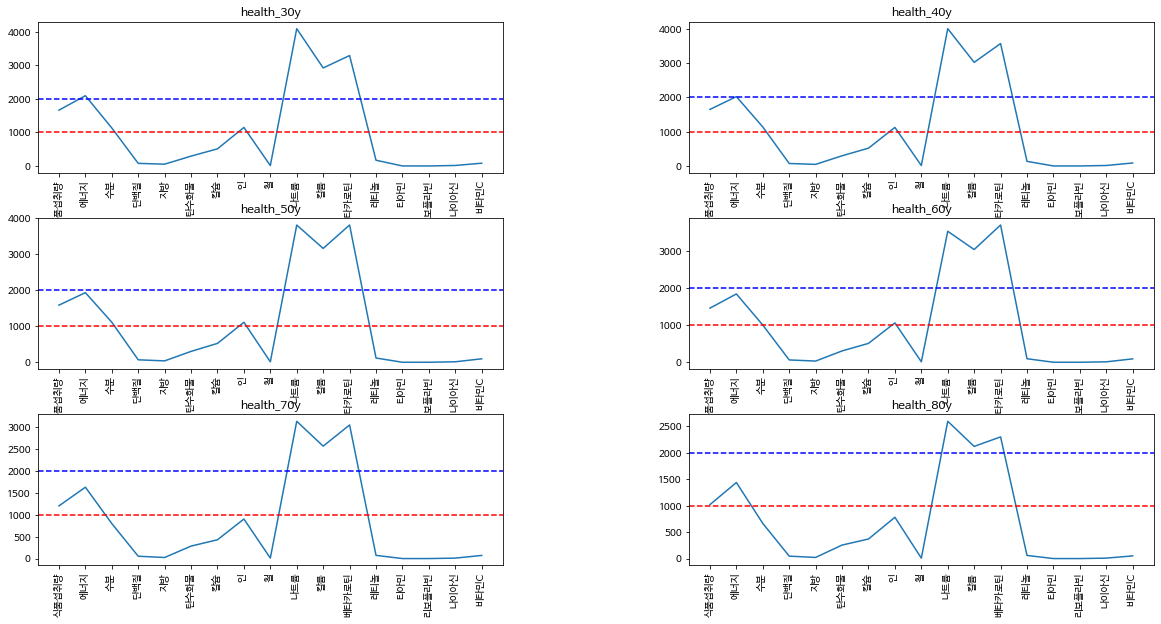

In [19]:
grid = gridspec.GridSpec(3,2)#그래프를 그릴 도화지 개수
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace= 0.4, hspace=0.3) #그래프 간의 거리 조절

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax2 = plt.subplot(grid[2])
ax3 = plt.subplot(grid[3])
ax4 = plt.subplot(grid[4])
ax5 = plt.subplot(grid[5])

ax0.plot(health_30y[nutritionF].mean())
ax0.set_title("health_30y")
ax0.axhline(1000,0,len(nutritionF), color='red', linestyle = '--')
ax0.axhline(2000,0,len(nutritionF), color='blue', linestyle = '--')
_=ax0.set_xticklabels(nutritionF_name, rotation=90)

ax1.plot(health_40y[nutritionF].mean())
ax1.set_title("health_40y")
ax1.axhline(1000,0,len(nutritionF), color='red', linestyle = '--')
ax1.axhline(2000,0,len(nutritionF), color='blue', linestyle = '--')
_=ax1.set_xticklabels(nutritionF_name, rotation=90)


ax2.plot(health_50y[nutritionF].mean())
ax2.set_title("health_50y")
ax2.axhline(1000,0,len(nutritionF), color='red', linestyle = '--')
ax2.axhline(2000,0,len(nutritionF), color='blue', linestyle = '--')
_=ax2.set_xticklabels(nutritionF_name, rotation=90)

ax3.plot(health_60y[nutritionF].mean())
ax3.set_title("health_60y")
ax3.axhline(1000,0,len(nutritionF), color='red', linestyle = '--')
ax3.axhline(2000,0,len(nutritionF), color='blue', linestyle = '--')
_=ax3.set_xticklabels(nutritionF_name, rotation=90)

ax4.plot(health_70y[nutritionF].mean())
ax4.set_title("health_70y")
ax4.axhline(1000,0,len(nutritionF), color='red', linestyle = '--')
ax4.axhline(2000,0,len(nutritionF), color='blue', linestyle = '--')
_=ax4.set_xticklabels(nutritionF_name, rotation=90)

ax5.plot(health_80y[nutritionF].mean())
ax5.set_title("health_80y")
ax5.axhline(1000,0,len(nutritionF), color='red', linestyle = '--')
ax5.axhline(2000,0,len(nutritionF), color='blue', linestyle = '--')
_=ax5.set_xticklabels(nutritionF_name, rotation=90)

In [20]:
health_30y[nutritionF]

,N_INTK,N_EN,N_WATER,N_PROT,N_FAT,N_CHO,N_CA,N_PHOS,N_FE,N_NA,N_K,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC
3,483.465500,990.499988,241.086056,46.289559,12.770166,171.517723,233.775800,698.190081,6.280085,2788.557434,1854.710127,2353.098756,1.216971,0.493381,0.591819,11.205493,46.506535
29,1673.000000,2532.758000,1108.527400,99.157400,67.807200,366.347000,927.452000,1544.608000,11.509800,2488.302000,2135.162000,87.168000,590.240000,0.990920,2.435420,6.421200,5.936000
58,1486.988293,1543.004904,1172.744215,51.088226,35.364242,186.771851,90.524898,796.965561,4.942083,1246.369021,1485.745876,1453.413821,11.707317,0.495669,0.840995,17.456288,9.727642
124,1980.537380,2893.564563,1367.159606,115.196295,125.420416,343.465302,1324.151825,2101.253669,18.353343,5361.476068,3787.414790,2631.993694,158.428788,1.574634,1.665658,28.540910,67.575045
137,1474.445277,2228.424471,944.856803,67.250523,41.939519,394.944849,436.110024,1006.594208,16.252061,7313.606387,2777.532360,2999.373885,49.422636,1.189130,0.692507,16.092542,73.831545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35592,2036.100000,1591.141500,1652.755900,86.248855,33.230335,250.359960,471.413500,1189.820500,12.307470,1675.377000,4107.261500,3685.310000,162.310000,1.403822,1.372837,21.665569,299.406275
35593,1508.995833,1527.568125,1187.132208,51.280669,29.817789,186.308247,172.402208,757.518917,2.420568,3157.455792,1451.704458,1913.762625,38.472000,0.659837,0.601053,9.733043,38.275286
35601,1540.665485,2189.967746,1021.988500,53.043748,38.957993,412.589437,445.840645,1122.206337,9.035719,2231.266758,2948.500297,3053.905612,98.955000,0.886322,1.245482,7.224497,41.011920
35603,759.030968,1052.578907,510.217824,34.697646,34.133564,154.643016,454.079581,648.138345,4.174973,790.135365,1770.237386,955.730716,130.371677,0.645014,0.597697,4.700091,28.828986


In [21]:
health[disease]

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35624,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35627,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#질병 걸린사람들만 체크 평균을 구할것이므로 -1은 신경안써줌
health_30y_disease = health_30y[disease]
health_30y_disease_1check = health_30y_disease[health_30y_disease == 1]
health_30y_disease_1check = health_30y_disease_1check.fillna(0)
health_30y_disease_1check_mean = health_30y_disease_1check.mean()

health_40y_disease = health_40y[disease]
health_40y_disease_1check = health_40y_disease[health_40y_disease == 1]
health_40y_disease_1check = health_40y_disease_1check.fillna(0)
health_40y_disease_1check_mean = health_40y_disease_1check.mean()

health_50y_disease = health_50y[disease]
health_50y_disease_1check = health_50y_disease[health_50y_disease == 1]
health_50y_disease_1check = health_50y_disease_1check.fillna(0)
health_50y_disease_1check_mean = health_50y_disease_1check.mean()

health_60y_disease = health_60y[disease]
health_60y_disease_1check = health_60y_disease[health_60y_disease == 1]
health_60y_disease_1check = health_60y_disease_1check.fillna(0)
health_60y_disease_1check_mean = health_60y_disease_1check.mean()

health_70y_disease = health_70y[disease]
health_70y_disease_1check = health_70y_disease[health_70y_disease == 1]
health_70y_disease_1check = health_70y_disease_1check.fillna(0)
health_70y_disease_1check_mean = health_70y_disease_1check.mean()

health_80y_disease = health_80y[disease]
health_80y_disease_1check = health_80y_disease[health_80y_disease == 1]
health_80y_disease_1check = health_80y_disease_1check.fillna(0)
health_80y_disease_1check_mean = health_80y_disease_1check.mean()

# 연령대별 질병비교

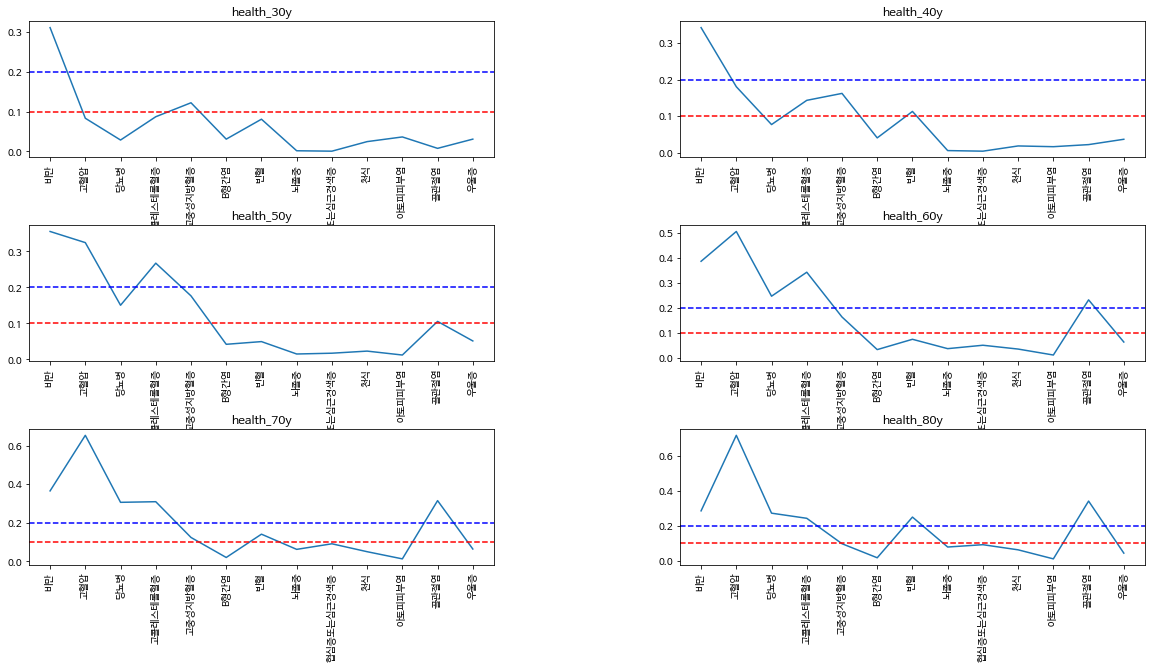

In [23]:
grid = gridspec.GridSpec(3,2)#그래프를 그릴 도화지 개수
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace= 0.4, hspace=0.5) #그래프 간의 거리 조절

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax2 = plt.subplot(grid[2])
ax3 = plt.subplot(grid[3])
ax4 = plt.subplot(grid[4])
ax5 = plt.subplot(grid[5])

ax0.plot(health_30y_disease_1check_mean)
ax0.set_title("health_30y")
ax0.axhline(0.1,0,len(disease), color='red', linestyle = '--')
ax0.axhline(0.2,0,len(disease), color='blue', linestyle = '--')
_=ax0.set_xticklabels(disease, rotation=90)

ax1.plot(health_40y_disease_1check_mean)
ax1.set_title("health_40y")
ax1.axhline(0.1,0,len(disease), color='red', linestyle = '--')
ax1.axhline(0.2,0,len(disease), color='blue', linestyle = '--')
_=ax1.set_xticklabels(disease, rotation=90)

ax2.plot(health_50y_disease_1check_mean)
ax2.set_title("health_50y")
ax2.axhline(0.1,0,len(disease), color='red', linestyle = '--')
ax2.axhline(0.2,0,len(disease), color='blue', linestyle = '--')
_=ax2.set_xticklabels(disease, rotation=90)

ax3.plot(health_60y_disease_1check_mean)
ax3.set_title("health_60y")
ax3.axhline(0.1,0,len(disease), color='red', linestyle = '--')
ax3.axhline(0.2,0,len(disease), color='blue', linestyle = '--')
_=ax3.set_xticklabels(disease, rotation=90)

ax4.plot(health_70y_disease_1check_mean)
ax4.set_title("health_70y")
ax4.axhline(0.1,0,len(disease), color='red', linestyle = '--')
ax4.axhline(0.2,0,len(disease), color='blue', linestyle = '--')
_=ax4.set_xticklabels(disease, rotation=90)

ax5.plot(health_80y_disease_1check_mean)
ax5.set_title("health_80y")
ax5.axhline(0.1,0,len(disease), color='red', linestyle = '--')
ax5.axhline(0.2,0,len(disease), color='blue', linestyle = '--')
_=ax5.set_xticklabels(disease, rotation=90)

#나이가들수록 고관절염증가가보임
#고혈압 점점 증가함
#당뇨가 점점 늘어남
#협심증또는심근경색증이 점점늘어남
#우울증도 늘어남 #일을 한사람과 안하사람의 우울증을 비교해보고싶었다

In [24]:
health['고혈압']

0        0.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
35624    1.0
35625    0.0
35626    0.0
35627    1.0
35628    0.0
Name: 고혈압, Length: 35629, dtype: float64

In [25]:
health_check = [
'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 'HE_Uket',
 'HE_Ubil',
 'HE_Ubld',
 'HE_Uro',
 'HE_Ucrea'
]

# 운동과 우울증의 관계

Text(0.5, 1.0, '운동을 전혀하지않은사람')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


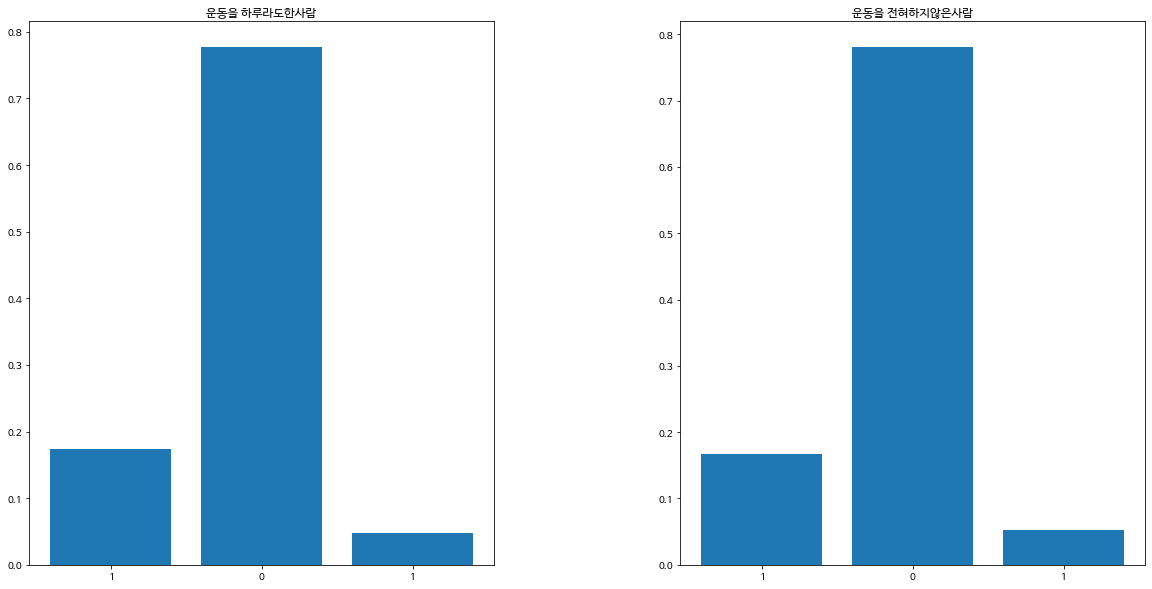

In [26]:
grid = gridspec.GridSpec(1,2)#그래프를 그릴 도화지 개수
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace= 0.4, hspace=0.5) #그래프 간의 거리 조절

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

all_cnt = health.query('BE3_31 > 1 or BE5_1 >1')['우울증'].value_counts()
x = [-1,0,1]
y = [all_cnt[-1]/all_cnt.sum(), all_cnt[0]/all_cnt.sum(), all_cnt[1]/all_cnt.sum()]

ax0.bar(x,y)
ax0.set_xticks(x)
ax0.set_title("운동을 하루라도한사람")

all_cnt = health.query('BE3_31 == 1 or BE5_1 ==1')['우울증'].value_counts()
x = [-1,0,1]
y = [all_cnt[-1]/all_cnt.sum(), all_cnt[0]/all_cnt.sum(), all_cnt[1]/all_cnt.sum()]

ax1.bar(x,y)
ax1.set_xticks(x)
ax1.set_title("운동을 전혀하지않은사람")

#운동과 우울증이 관련있을줄 알았으나 전혀 관련이없음

In [27]:
health_info.query("variable == @health_check")

,variable,variable description,option description,etc,data type,not applicable,unknown,variable bins,selected
428,HE_fst,공복시간,NaN,['□□ 시간'],numeric,NaN,NaN,12.0:13.0:14.0,1.0
429,HE_HPdr,검진당일 고혈압 약 복용 여부,0 : 아니오 | 1 : 예 | 8 : 비해당(선행문항의 고혈압 의사진단 없음),[],category,8.0,NaN,NaN,1.0
430,HE_DMdr,검진당일 당뇨병 약 복용 여부,0 : 아니오 | 1 : 예 | 8 : 비해당(선행문항의 당뇨병 의사진단 없음),[],category,8.0,NaN,NaN,1.0
431,HE_mens,생리여부,0 : 아니오 | 1 : 예 | 8 : 비해당(남자) |,[],category,8.0,NaN,NaN,1.0
432,HE_prg,임신여부,0 : 아니오 | 1 : 예 | 8 : 비해당(남자) |,[],category,8.0,NaN,NaN,1.0
435,HE_HPfh1,고혈압 의사진단 여부(부),0 : 아니오 | 1 : 예 | 9 : 모름/무응답 |,[],category,NaN,9,NaN,1.0
436,HE_HPfh2,고혈압 의사진단 여부(모),0 : 아니오 | 1 : 예 | 9 : 모름/무응답 |,[],category,NaN,9,NaN,1.0
437,HE_HPfh3,고혈압 의사진단 여부(형제자매),0 : 아니오 | 1 : 예 | 8 : 비해당 | 9 : 모름/무응답 |,[],category,8.0,9,NaN,1.0
438,HE_HLfh1,고지혈증 의사진단 여부(부),0 : 아니오 | 1 : 예 | 9 : 모름/무응답 |,[],category,NaN,9,NaN,1.0
439,HE_HLfh2,고지혈증 의사진단 여부(모),0 : 아니오 | 1 : 예 | 9 : 모름/무응답 |,[],category,NaN,9,NaN,1.0


In [28]:
health_info.query("variable == 'HE_HP'")

,variable,variable description,option description,etc,data type,not applicable,unknown,variable bins,selected
468,HE_HP,고혈압 유병여부(19세이상),1 : 정상 | 2 : 고혈압전단계 | 3 : 고혈압 |,['Ï고혈압: 수축기혈압이 140mmHg 이상 또는 이완기혈압이 90mmHg 이상 ...,category,NaN,NaN,NaN,NaN


In [29]:
health['고혈압'].value_counts()

0.0    22516
1.0    13113
Name: 고혈압, dtype: int64

# 질병과 영양소 관계분석

In [63]:
nutritionF #영양소
disease #질병

In [215]:
def relation_disease_nutrition(dis):

  health_do = health[health[dis] == 1]
  health_dx = health[health[dis] != 1]
 
  grid = gridspec.GridSpec(1,2)#그래프를 그릴 도화지 개수
  plt.figure(figsize=(20,5))
  plt.subplots_adjust(wspace= 0.4, hspace=0.3) #그래프 간의 거리 조절

  ax0 = plt.subplot(grid[0])
  ax1 = plt.subplot(grid[1])

  ax0.plot(health_do[nutritionF].mean())
  ax0.set_ylim([0, 4000]) 
  ax0.set_title(f"{dis} 있는사람의 영양소분석")
  ax0.axhline(250,0,len(nutritionF), color='purple', linestyle = '--')
  ax0.axhline(500,0,len(nutritionF), color='orange', linestyle = '--')
  ax0.axhline(1000,0,len(nutritionF), color='red', linestyle = '--')
  ax0.axhline(2000,0,len(nutritionF), color='blue', linestyle = '--')
  ax0.axhline(3000,0,len(nutritionF), color='green', linestyle = '--')
  ax0.axhline(3500,0,len(nutritionF), color='black', linestyle = '--')

  _=ax0.set_xticklabels(nutritionF_name, rotation=90)

  ax1.plot(health_dx[nutritionF].mean())
  ax1.set_ylim([0, 4000]) 
  ax1.set_title(f"{dis} 없는사람의 영양소분석")
  ax1.axhline(250,0,len(nutritionF), color='purple', linestyle = '--')
  ax1.axhline(500,0,len(nutritionF), color='orange', linestyle = '--')
  ax1.axhline(1000,0,len(nutritionF), color='red', linestyle = '--')
  ax1.axhline(2000,0,len(nutritionF), color='blue', linestyle = '--')
  ax1.axhline(3000,0,len(nutritionF), color='green', linestyle = '--')
  ax1.axhline(3500,0,len(nutritionF), color='black', linestyle = '--')
  _=ax1.set_xticklabels(nutritionF_name, rotation=90)

In [195]:
# plt.axis([0, 3, 2, 5])	# x축은 0~3 까지, y축은 2~5 까지 보여줍니다 ##특정영역 확대 강조

In [196]:
# 영양소를 더 세부적을봐야함 그래프에 표현안된게있음
# 분석마다 추가분석해야할게있음
# 영양소마다 적정치가 보임 그것도 분석이 가능할듯함
# 영양소마다 질병분석도 해야할듯함

## 비만

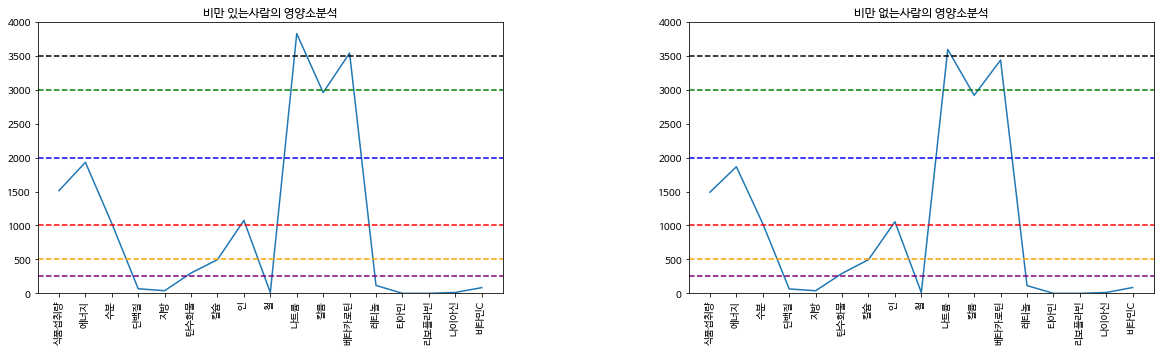

In [217]:
relation_disease_nutrition(disease[0])

#비만있는 사람이 없는사람보다 나트륨과 베타카로틴이 더 많음

## 고혈압

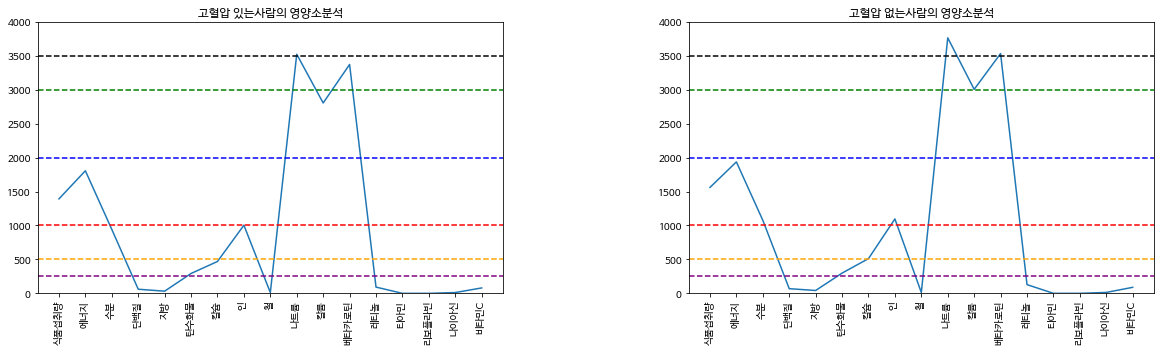

In [218]:
relation_disease_nutrition(disease[1])

#고혈압있는사람이 없는사람보다 나트륨이적음, 칼륨이적음, 베타카로틴이적음 인이적음 에너지가적음 + 운동과 고혈압과 관계가있을것도같음
# + 고혈압은 전체적으로 영양소가 다 부족한거같음



## 당뇨병

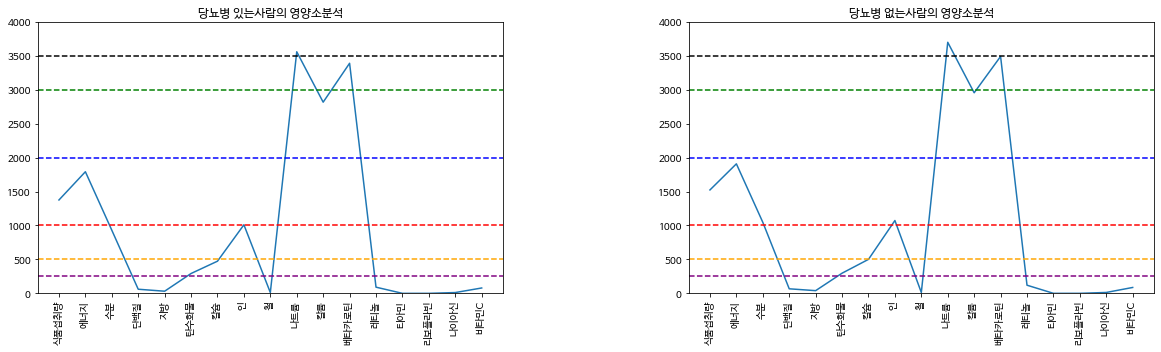

In [219]:
relation_disease_nutrition(disease[2])
#당뇨병 있는사람이 없는사람보다 에너지 가 더 적음 나트륨이 더 적음, 베라카로틴이 더 적음, 칼륨이 더 적음

## 고콜레스테롤혈증

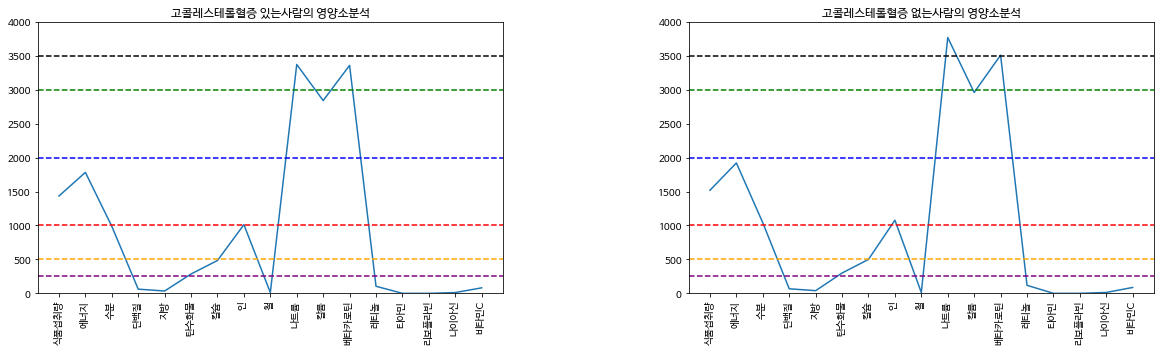

In [220]:
relation_disease_nutrition(disease[3])
#고콜레스테롤혈증이 있는사람이 없는사람보다 에너지가 적음 나트륨이적음 칼륨이적음 베타카로틴이적음

## 고중성지방혈증

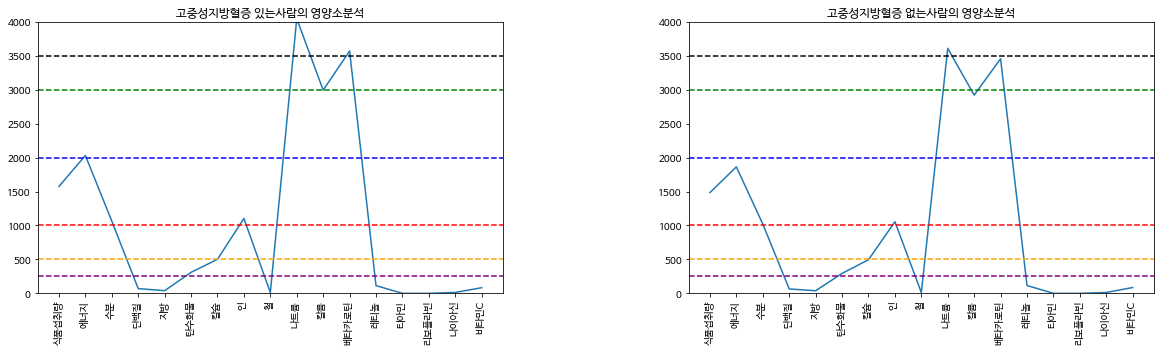

In [221]:
relation_disease_nutrition(disease[4])

#고중성지방혈증이 있는사람이 없는사람보다 에너지가큼, 나트륨이많음, 베타카로틴이많음

## B형간염

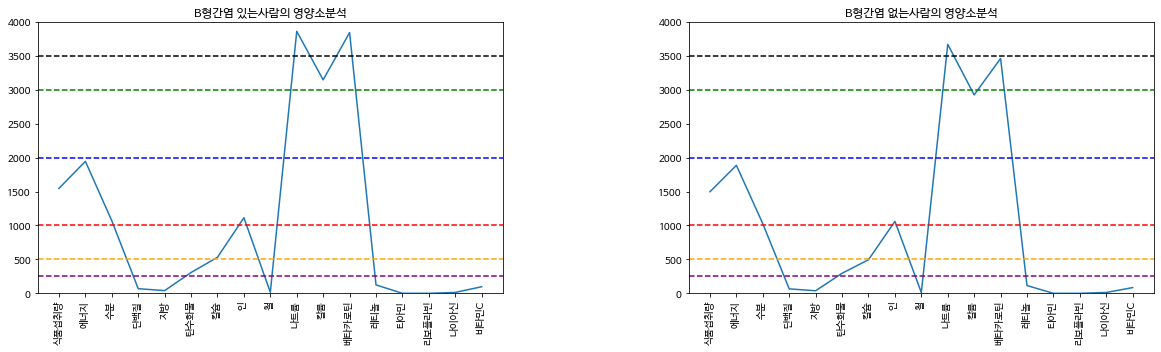

In [222]:
relation_disease_nutrition(disease[5])

# B형간염있는사람이 B형감염이 없는사람보다 나트륨이많음, 칼륨이많음, 베타카로틴이많음

## 빈혈

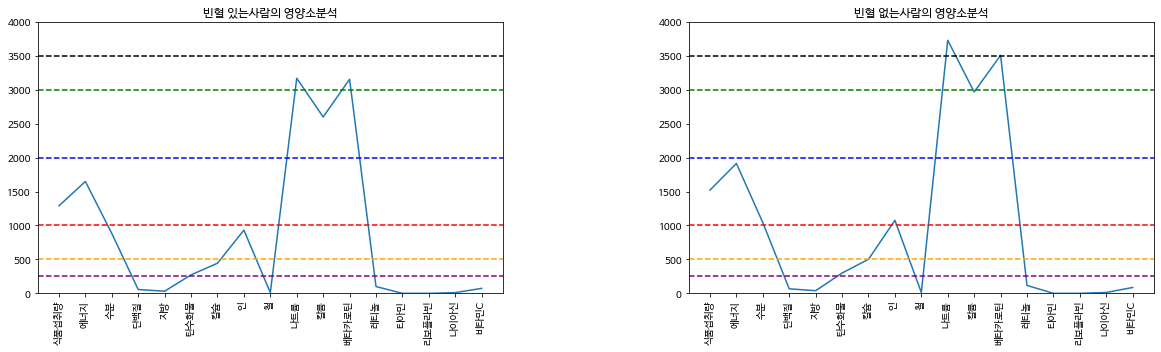

In [223]:
relation_disease_nutrition(disease[6])

#빈혈이 있는사람이 없는사람보다 에너지가 작음 인이작음 나트륨이 작음 칼륨이작음 베카타로틴이작음

## 뇌졸중

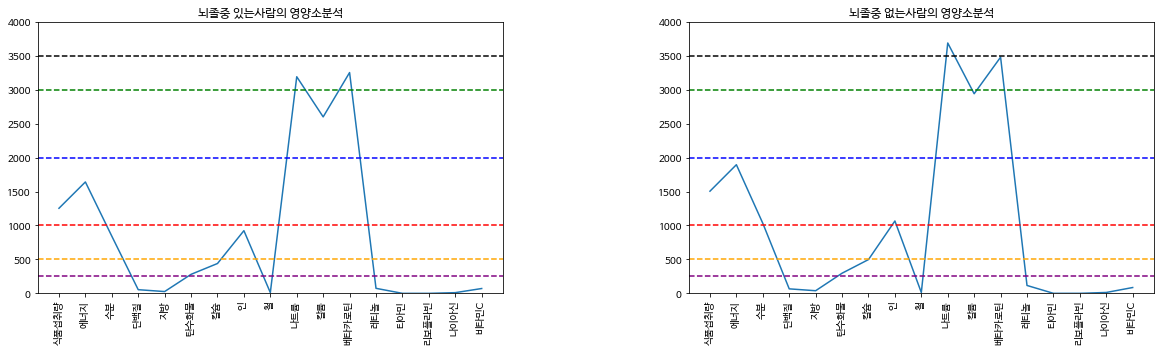

In [224]:
relation_disease_nutrition(disease[7])

#뇌졸중있는사람이 뇌졸중이없는사람보다 에너지가 작음 인이작음 나트륨, 칼슘, 베타카로틴이작음

## 협심증또는심근경색증

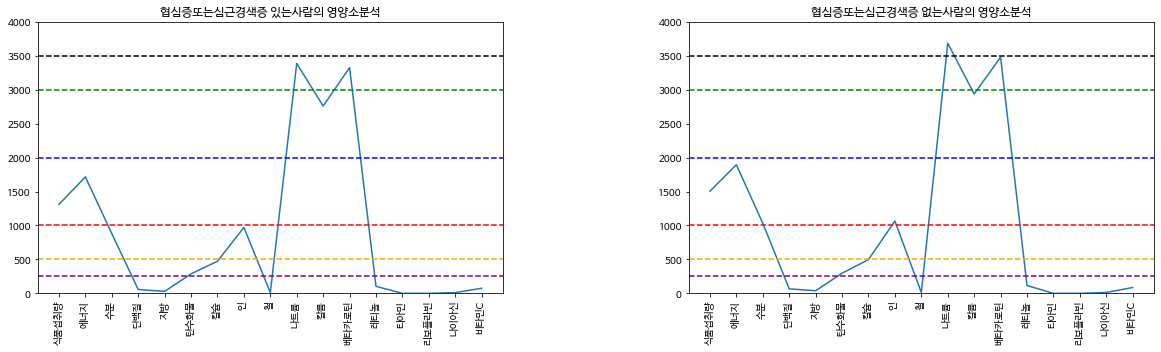

In [225]:
relation_disease_nutrition(disease[8])

# 협심증또는심근경색증이 있는사람이 없는사람보다 에너지가작음 나트륨이작음 칼륨이작음 베타카로틴이작음

## 천식


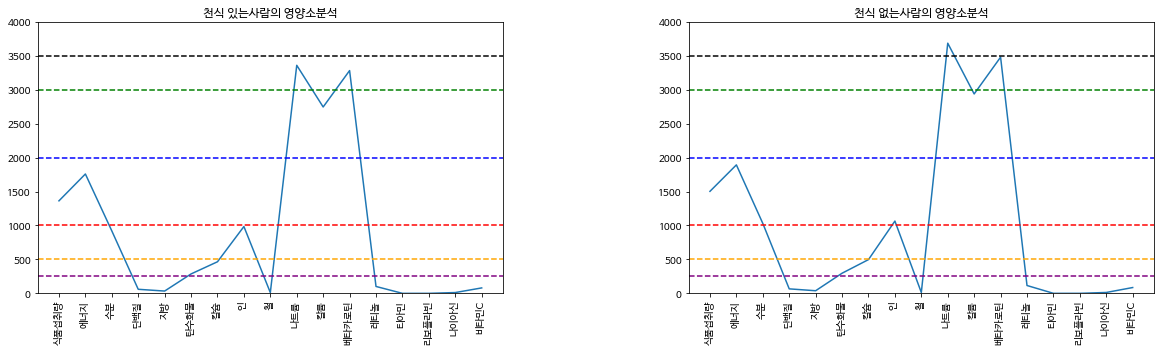

In [226]:
relation_disease_nutrition(disease[9])

#천식이있는사람이 없는사람보다 에너지가작음 나트륨이작음 칼륨이작음 베타카로틴이작음

## 아토피피부염

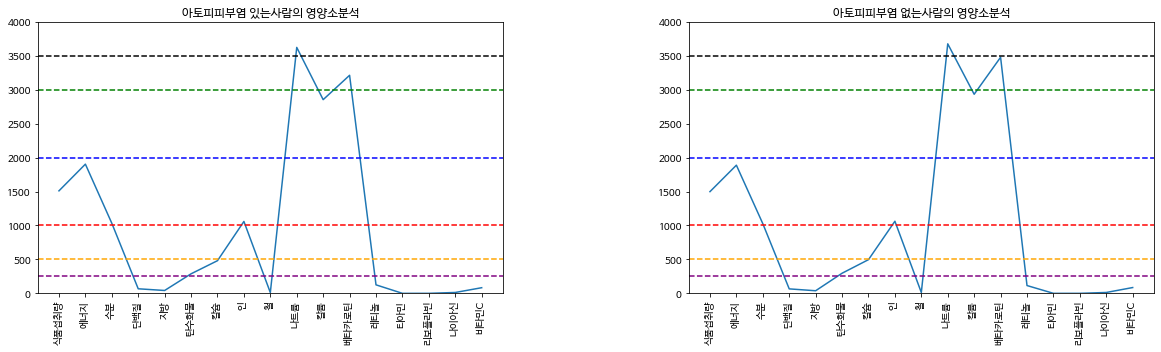

In [227]:
relation_disease_nutrition(disease[10])

#아토피피부염이있는사람이 없는사람보다 칼륨이적음 베타카로틴이적음

## 골관절염

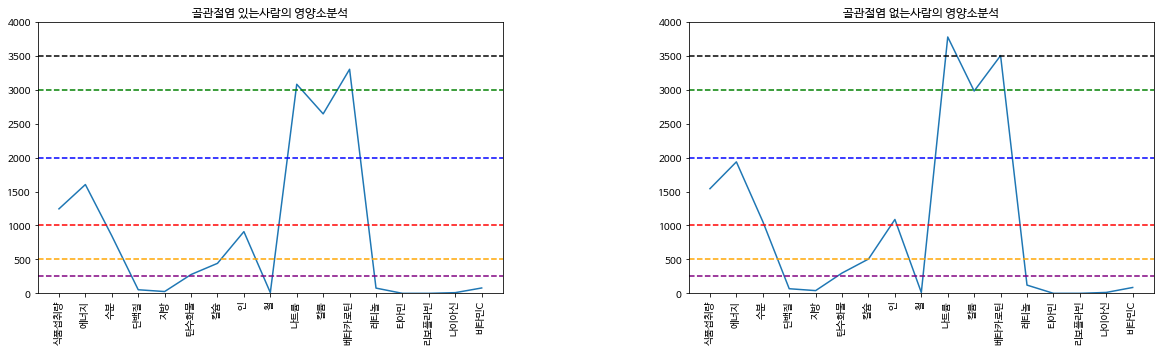

In [228]:
relation_disease_nutrition(disease[11])

# 골관절염이 있는사람이 없는사람보다 에너지가 작음 인이작음 나트륨이작음 칼륨이작음 베타카로틴이작음

## 우울증

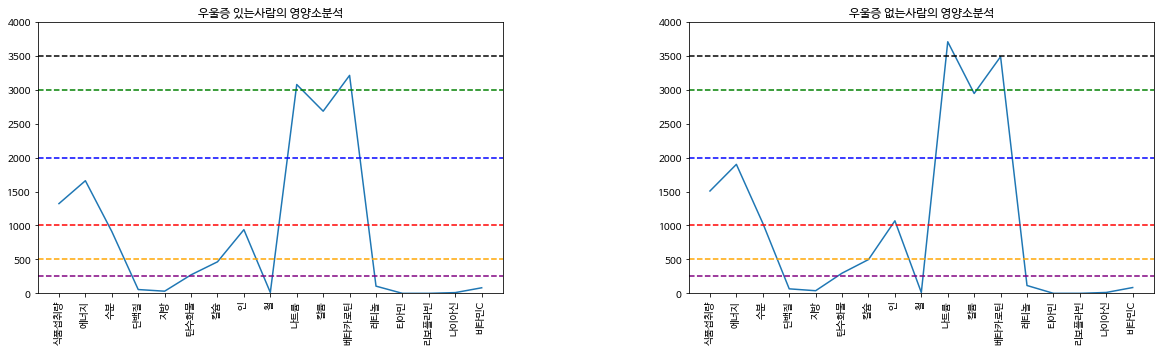

In [236]:
relation_disease_nutrition(disease[12])

# 우울증이 있는사람이 없는사람보다 에너지가작음 인이작음 나트륨이작음 칼륨이작음 베타카로틴이작음

In [229]:
disease

['비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']

# 고혈압과 고혈압가족력 간의관계

Text(0.5, 1.0, '가족력이없는사람')

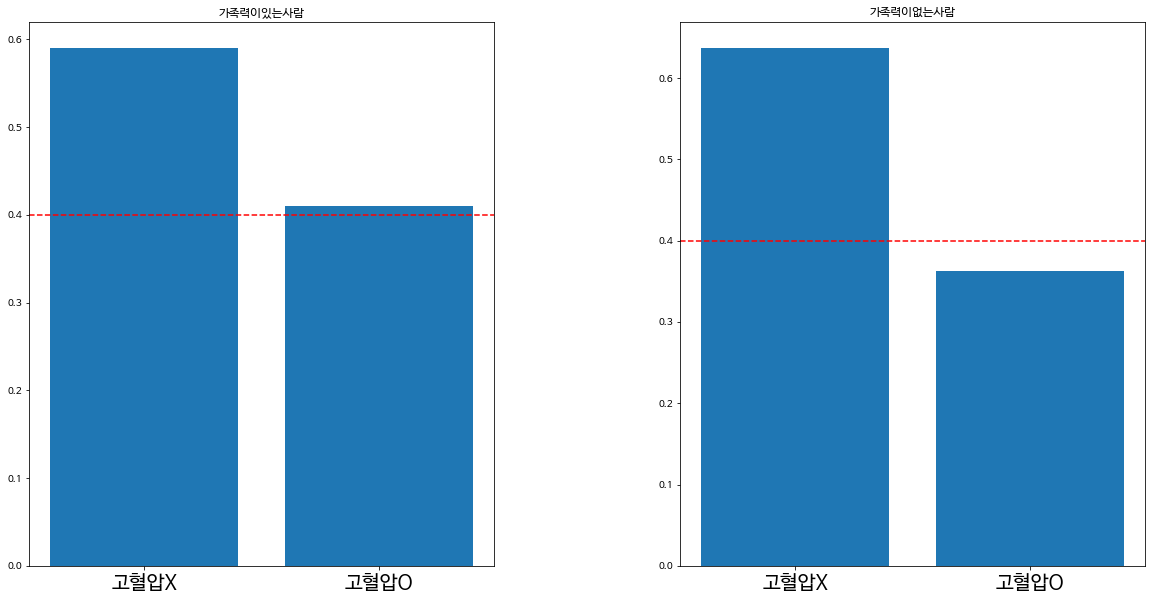

In [230]:
grid = gridspec.GridSpec(1,2)#그래프를 그릴 도화지 개수
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace= 0.4, hspace=0.5) #그래프 간의 거리 조절

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

family_high_blood_presure =health.query('HE_HPfh1 == 1 or HE_HPfh2 == 1 or HE_HPfh3 == 1')
Nofamily_high_blood_presure =health.query('HE_HPfh1 != 1 or HE_HPfh2 != 1 or HE_HPfh3 != 1')

all_cnt = family_high_blood_presure['고혈압'].value_counts()
x = [0,1]
y = [all_cnt[0]/all_cnt.sum(), all_cnt[1]/all_cnt.sum()]
ax0.bar(x,y)
ax0.set_xticks(x)
ax0.axhline(0.4,0,len(x), color='red', linestyle = '--')
_=ax0.set_xticklabels(['고혈압X','고혈압O'],fontsize=20)
ax0.set_title("가족력이있는사람")

all_cnt = Nofamily_high_blood_presure['고혈압'].value_counts()
x = [0,1]
y = [all_cnt[0]/all_cnt.sum(), all_cnt[1]/all_cnt.sum()]

ax1.bar(x,y)
ax1.set_xticks(x)
ax1.axhline(0.4,0,len(x), color='red', linestyle = '--')
_=ax1.set_xticklabels(['고혈압X','고혈압O'],fontsize=20)
ax1.set_title("가족력이없는사람")

# 고혈압가족력과 고혈압은 관계가있다.

# 뇌졸종과 가족력간의 관계

Text(0.5, 1.0, '가족력이없는사람')

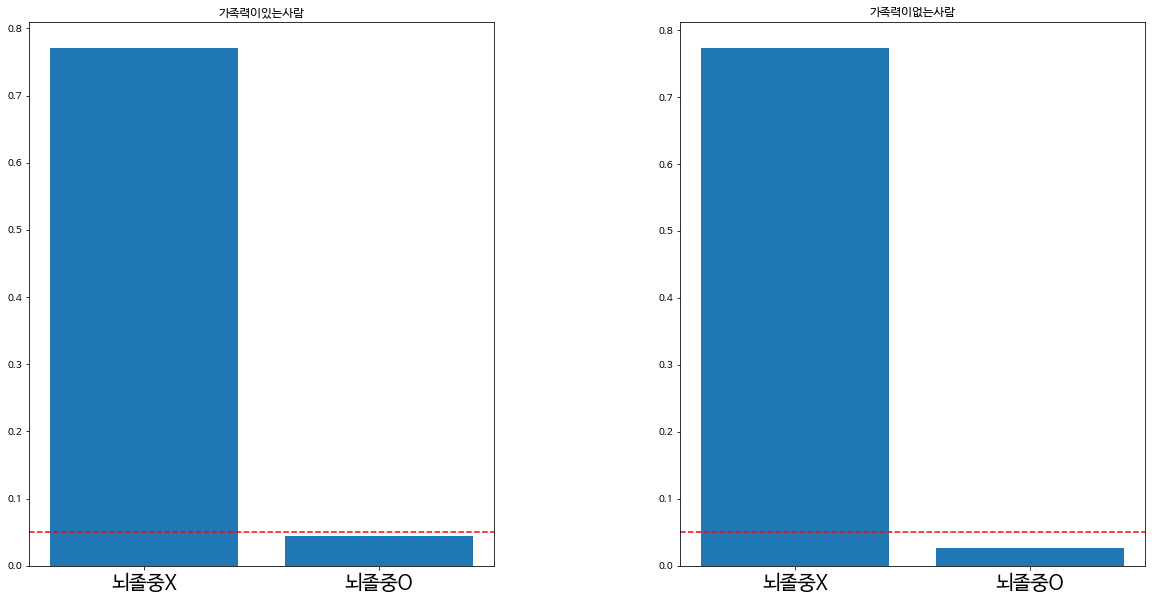

In [231]:
grid = gridspec.GridSpec(1,2)#그래프를 그릴 도화지 개수
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace= 0.4, hspace=0.5) #그래프 간의 거리 조절

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
   
family_stroke =health.query('HE_STRfh1 == 1 or HE_STRfh2 == 1 or HE_STRfh3 == 1')
Nofamily_stroke =health.query('HE_STRfh1 != 1 or HE_STRfh2 != 1 or HE_STRfh3 != 1')

all_cnt = family_stroke['뇌졸중'].value_counts()
x = [0,1]
y = [all_cnt[0]/all_cnt.sum(), all_cnt[1]/all_cnt.sum()]
ax0.bar(x,y)
ax0.set_xticks(x)
ax0.axhline(0.05,0,len(x), color='red', linestyle = '--')
_=ax0.set_xticklabels(['뇌졸중X','뇌졸중O'],fontsize=20)
ax0.set_title("가족력이있는사람")

all_cnt = Nofamily_stroke['뇌졸중'].value_counts()
x = [0,1]
y = [all_cnt[0]/all_cnt.sum(), all_cnt[1]/all_cnt.sum()]

ax1.bar(x,y)
ax1.set_xticks(x)
ax1.axhline(0.05,0,len(x), color='red', linestyle = '--')
_=ax1.set_xticklabels(['뇌졸중X','뇌졸중O'],fontsize=20)
ax1.set_title("가족력이없는사람")

# 뇌졸중은 가족력과 관계가있다.

# 당뇨와 당뇨가족력 간의관계

Text(0.5, 1.0, '가족력이없는사람')

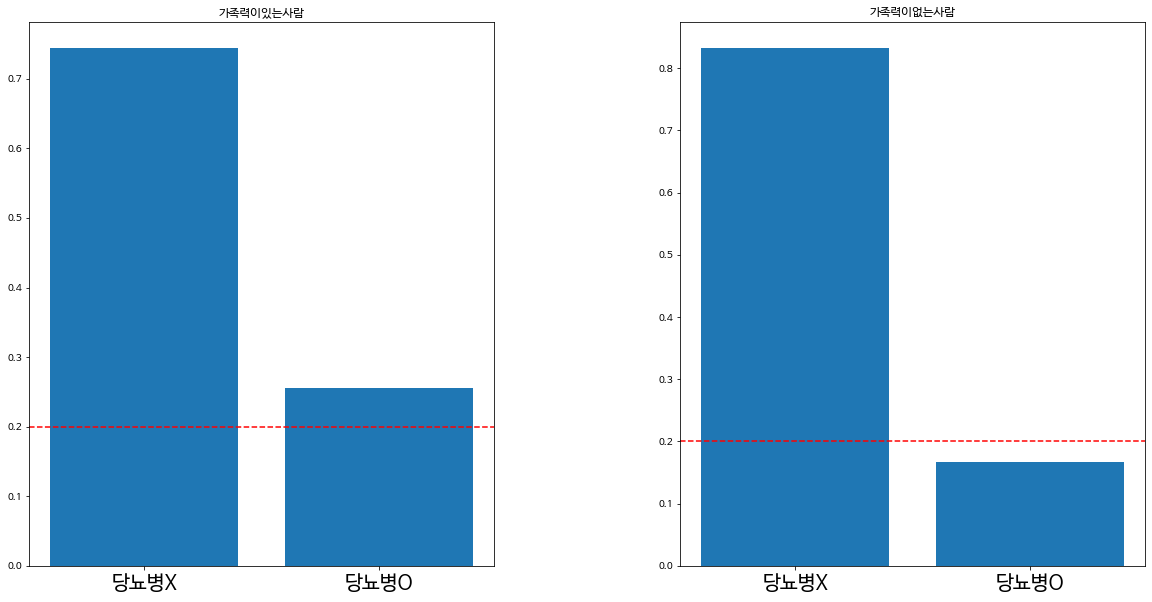

In [232]:
grid = gridspec.GridSpec(1,2)#그래프를 그릴 도화지 개수
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace= 0.4, hspace=0.5) #그래프 간의 거리 조절

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
   
#    HE_DMfh1	
# HE_DMfh2
# HE_DMfh3	

family_diabetes =health.query('HE_DMfh1 == 1 or HE_DMfh2 == 1 or HE_DMfh3 == 1')
Nofamily_diabetes =health.query('HE_DMfh1 != 1 or HE_DMfh2 != 1 or HE_DMfh3 != 1')

all_cnt = family_diabetes['당뇨병'].value_counts()
x = [0,1]
y = [all_cnt[0]/all_cnt.sum(), all_cnt[1]/all_cnt.sum()]
ax0.bar(x,y)
ax0.set_xticks(x)
ax0.axhline(0.2,0,len(x), color='red', linestyle = '--')
_=ax0.set_xticklabels(['당뇨병X','당뇨병O'],fontsize=20)
ax0.set_title("가족력이있는사람")

all_cnt = Nofamily_diabetes['당뇨병'].value_counts()
x = [0,1]
y = [all_cnt[0]/all_cnt.sum(), all_cnt[1]/all_cnt.sum()]

ax1.bar(x,y)
ax1.set_xticks(x)
ax1.axhline(0.2,0,len(x), color='red', linestyle = '--')
_=ax1.set_xticklabels(['당뇨병X','당뇨병O'],fontsize=20)
ax1.set_title("가족력이없는사람")

# 당뇨병과 가족력은 관계가있다.

In [233]:
#스트레스와 영양소의 관계

In [234]:
#  내일할것 : 질병간 환자분석 (영양소나 스트레스나 음주 흡연 운동)